# Objective

- We will perform EDA to check relationship of different predictor variables with respect to each other and also the target variable.
- We will do data cleaning and preprocessing wherever required.
- We will build models and predict whether a person will have chronic kideny disease (CKD) or not based on given features.
- We will check which features played most important role in the prediction.
- We will also check why these particular features  are responsible for the disease.

##### We will use the following features from the dataset
-  age - Age
-  bp - Blood pressure
-  sg - Specific gravity
-  al - Albumin
-  su - Sugar
-  rbc - Red blood cells
-  pc - Pus cell
-  pcc - Pus cell clumps
-  ba - Bacteria
-  bgr - Blood glucose random
-  bu - Blood urea
-  sc - Serum creatinine
-  sod - Sodium
-  pot - Potassium
-  hemo - Hemoglobin
-  pcv - Packed cell volume
-  wc - White blood cell count
-  rc - Red blood cell count

# Import Packages

In [1]:
# Make necessary import 

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure

# Import Data

In [2]:
#reading data
data = pd.read_csv('D:\Siddhesh\Data Science - D\Projects\HealthCare Domain\kidney_disease.csv')

In [3]:
data.shape # shape of dataframe

(400, 26)

In [4]:
pd.set_option('display.max_columns',26) #dispalying all columns

In [5]:
data

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0   0.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba    bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm  \
0    notpresent  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes   
1    notpresent    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no   
2    notpresent  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes   
3    notpresent  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no   
4    notpresent  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no   
..          ...    ...   ...  ...    ...  ...   ...  ..   ...  ...  ...  ...   
395  notpresent  140.0  49.0  0.5  150.0  4.9  15.7  47  6700  4.9   no   no   
396  notpresent   75.0  31.0  1.2  141.0  3.5  16.5  54  7800  6.2   no   no   
397  notpresent  100.0  26.0  0.6  137.0  4.4  15.8  49  6600  5.4   no   no   
398  notpresent  114.0  50.0  1.0  135.0  4.9  14.2  51  7200  5.9   no   no   
399  notpresent  131.0  18.0  1.1  141.0  3.5  15.8  53  6800  6.1   no   no   

    cad appet   pe  ane classification  
0    no  good   no   no            ckd  
1    no  good   no   no            ckd  
2    no  poor   no  yes            ckd  
3    no  poor  yes  yes            ckd  
4    no  good   no   no            ckd  
..   ..   ...  ...  ...            ...  
395  no  good   no   no         notckd  
396  no  good   no   no         notckd  
397  no  good   no   no         notckd  
398  no  good   no   no         notckd  
399  no  good   no   no         notckd  

[400 rows x 26 columns]

In [6]:
# lets begin with renaming our columns so that their name makes more sense.

In [7]:
col_names={"bp":"blood_pressure","sg":"specific_gravity","al":"albumin","su":"sugar",
            "rbc":"red_blood_cells","pc":"pus_cell","pcc":"pus_cell_clumps",
          "ba":"bacteria","bgr":"blood_glucose_random","bu":"blood_urea",
          "sc":"serum_creatinine","sod":"sodium","pot":"potassium","hemo":"haemoglobin",
          "pcv":"packed_cell_volume","wc":"white_blood_cell_count","rc":"red_blood_cell_count",
          "htn":"hypertension","dm":"diabetes_mellitus","cad":"coronary_artery_disease",
          "appet":"appetite","pe":"pedal_edema","ane":"anemia","classification":"diagnosis_result"}

data.rename(columns=col_names, inplace=True)

In [8]:
#reading dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
data.describe().T

count        mean         std     min     25%     50%  \
id                    400.0  199.500000  115.614301   0.000   99.75  199.50   
age                   391.0   51.483376   17.169714   2.000   42.00   55.00   
blood_pressure        388.0   76.082474   14.736739   0.000   70.00   80.00   
specific_gravity      353.0    1.017408    0.005717   1.005    1.01    1.02   
albumin               354.0    1.016949    1.352679   0.000    0.00    0.00   
sugar                 351.0    0.450142    1.099191   0.000    0.00    0.00   
blood_glucose_random  356.0  148.036517   79.281714  22.000   99.00  121.00   
blood_urea            381.0   57.425722   50.503006   1.500   27.00   42.00   
serum_creatinine      383.0    3.072454    5.741126   0.400    0.90    1.30   
sodium                313.0  137.528754   10.408752   4.500  135.00  138.00   
potassium             312.0    4.627244    3.193904   2.500    3.80    4.40   
haemoglobin           348.0   12.474713    3.040816   0.000   10.30   12.65   

                         75%      max  
id                    299.25  399.000  
age                    64.50   90.000  
blood_pressure         80.00  180.000  
specific_gravity        1.02    1.025  
albumin                 2.00    5.000  
sugar                   0.00    5.000  
blood_glucose_random  163.00  490.000  
blood_urea             66.00  391.000  
serum_creatinine        2.80   76.000  
sodium                142.00  163.000  
potassium               4.90   47.000  
haemoglobin            15.00   17.800

# Data Cleaning

In [10]:
# dropping id column because each id is unique and no way going to help us in diagnosis.
data.drop('id',axis=1,inplace=True)

In [11]:
# Extracting categorical and numerical columns

col_cate = [col for col in data.columns if data[col].dtype == 'object']
col_num = [col for col in data.columns if data[col].dtype != 'object']

In [12]:
print( f'There are {len(col_cate)} number of Categorical columns:\n',col_cate)
print('----'*15)
print(f'There are {len(col_num)} number of Numerical columns:\n',col_num)

There are 14 number of Categorical columns:
 ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'diagnosis_result']
------------------------------------------------------------
There are 11 number of Numerical columns:
 ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin']


##### Few numerical columns have data type as object. Need to convert them to numeric data type

In [13]:
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')

In [14]:
# Extracting categorical and numerical columns

col_cate = [col for col in data.columns if data[col].dtype == 'object']
col_num = [col for col in data.columns if data[col].dtype != 'object']

In [15]:
print( f'There are {len(col_cate)} number of Categorical columns:\n',col_cate)
print('----'*15)
print(f'There are {len(col_num)} number of Numerical columns:\n',col_num)

There are 11 number of Categorical columns:
 ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'diagnosis_result']
------------------------------------------------------------
There are 14 number of Numerical columns:
 ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [16]:
data.describe().T

count         mean          std       min      25%  \
age                     391.0    51.483376    17.169714     2.000    42.00   
blood_pressure          388.0    76.082474    14.736739     0.000    70.00   
specific_gravity        353.0     1.017408     0.005717     1.005     1.01   
albumin                 354.0     1.016949     1.352679     0.000     0.00   
sugar                   351.0     0.450142     1.099191     0.000     0.00   
blood_glucose_random    356.0   148.036517    79.281714    22.000    99.00   
blood_urea              381.0    57.425722    50.503006     1.500    27.00   
serum_creatinine        383.0     3.072454     5.741126     0.400     0.90   
sodium                  313.0   137.528754    10.408752     4.500   135.00   
potassium               312.0     4.627244     3.193904     2.500     3.80   
haemoglobin             348.0    12.474713     3.040816     0.000    10.30   
packed_cell_volume      329.0    38.884498     8.990105     9.000    32.00   
white_blood_cell_count  294.0  8406.122449  2944.474190  2200.000  6500.00   
red_blood_cell_count    269.0     4.707435     1.025323     2.100     3.90   

                            50%      75%        max  
age                       55.00    64.50     90.000  
blood_pressure            80.00    80.00    180.000  
specific_gravity           1.02     1.02      1.025  
albumin                    0.00     2.00      5.000  
sugar                      0.00     0.00      5.000  
blood_glucose_random     121.00   163.00    490.000  
blood_urea                42.00    66.00    391.000  
serum_creatinine           1.30     2.80     76.000  
sodium                   138.00   142.00    163.000  
potassium                  4.40     4.90     47.000  
haemoglobin               12.65    15.00     17.800  
packed_cell_volume        40.00    45.00     54.000  
white_blood_cell_count  8000.00  9800.00  26400.000  
red_blood_cell_count       4.80     5.40      8.000

## Missing value check

In [17]:
# missing value
miss_val = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

In [18]:
miss_val[col_cate]

red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
diagnosis_result            0.00
dtype: float64

In [19]:
(miss_val[col_num]).sort_values(ascending=False)

red_blood_cell_count      32.75
white_blood_cell_count    26.50
potassium                 22.00
sodium                    21.75
packed_cell_volume        17.75
haemoglobin               13.00
sugar                     12.25
specific_gravity          11.75
albumin                   11.50
blood_glucose_random      11.00
blood_urea                 4.75
serum_creatinine           4.25
blood_pressure             3.00
age                        2.25
dtype: float64

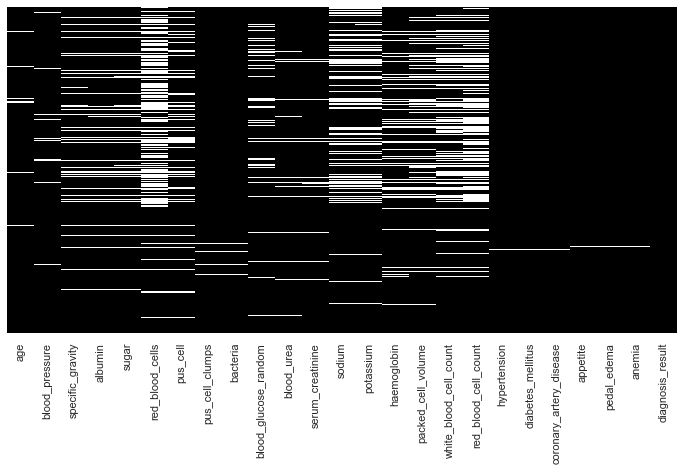

In [20]:
# heat map showing misisng values
plt.figure(figsize = (12,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')
plt.show()

***Observation:***

1. Many numerical features values have missing values.
2. Red_blood_cells and pus_cell are only categorical columns with high missing values.
3. We cannot simply drop these features as they may contain useful information for diagnosis. We will impute them later.
4. We will decide the method of imputation after analyzing the distribution


## Zero Variance Check

In [21]:
data.nunique()[data.nunique()==1]

Series([], dtype: int64)

##### There are no features with single value. 

## Unique Values in dataset

In [22]:
# unique features in caegorical columns
for i in col_cate:
    print(f'There are {data[i].nunique()} number of values in feature {i}:\n',data[i].unique())
    print('----'*20)

There are 2 number of values in feature red_blood_cells:
 [nan 'normal' 'abnormal']
--------------------------------------------------------------------------------
There are 2 number of values in feature pus_cell:
 ['normal' 'abnormal' nan]
--------------------------------------------------------------------------------
There are 2 number of values in feature pus_cell_clumps:
 ['notpresent' 'present' nan]
--------------------------------------------------------------------------------
There are 2 number of values in feature bacteria:
 ['notpresent' 'present' nan]
--------------------------------------------------------------------------------
There are 2 number of values in feature hypertension:
 ['yes' 'no' nan]
--------------------------------------------------------------------------------
There are 5 number of values in feature diabetes_mellitus:
 ['yes' 'no' ' yes' '\tno' '\tyes' nan]
--------------------------------------------------------------------------------
There are 3 num

##### We can see that there are some typograhical errors in data which have created new categorical values. We need to correct this.

In [23]:
# replacing typo erros

data['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['coronary_artery_disease'] = data['coronary_artery_disease'].replace('\tno', value='no')

data['diagnosis_result'] = data['diagnosis_result'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [24]:
# unique features in caegorical columns
for i in col_cate:
    print(f'There are {data[i].nunique()} number of values in feature {i}:\n',data[i].unique())
    print('----'*20)

There are 2 number of values in feature red_blood_cells:
 [nan 'normal' 'abnormal']
--------------------------------------------------------------------------------
There are 2 number of values in feature pus_cell:
 ['normal' 'abnormal' nan]
--------------------------------------------------------------------------------
There are 2 number of values in feature pus_cell_clumps:
 ['notpresent' 'present' nan]
--------------------------------------------------------------------------------
There are 2 number of values in feature bacteria:
 ['notpresent' 'present' nan]
--------------------------------------------------------------------------------
There are 2 number of values in feature hypertension:
 ['yes' 'no' nan]
--------------------------------------------------------------------------------
There are 2 number of values in feature diabetes_mellitus:
 ['yes' 'no' nan]
--------------------------------------------------------------------------------
There are 2 number of values in featu

##### Only issue is imputing the missing values. Before that lets check distribution and do EDA.

# EDA

### Let's begin the analysis by checking the distribution of numerical features.

In [25]:
import matplotlib.style as style
style.use('fivethirtyeight')

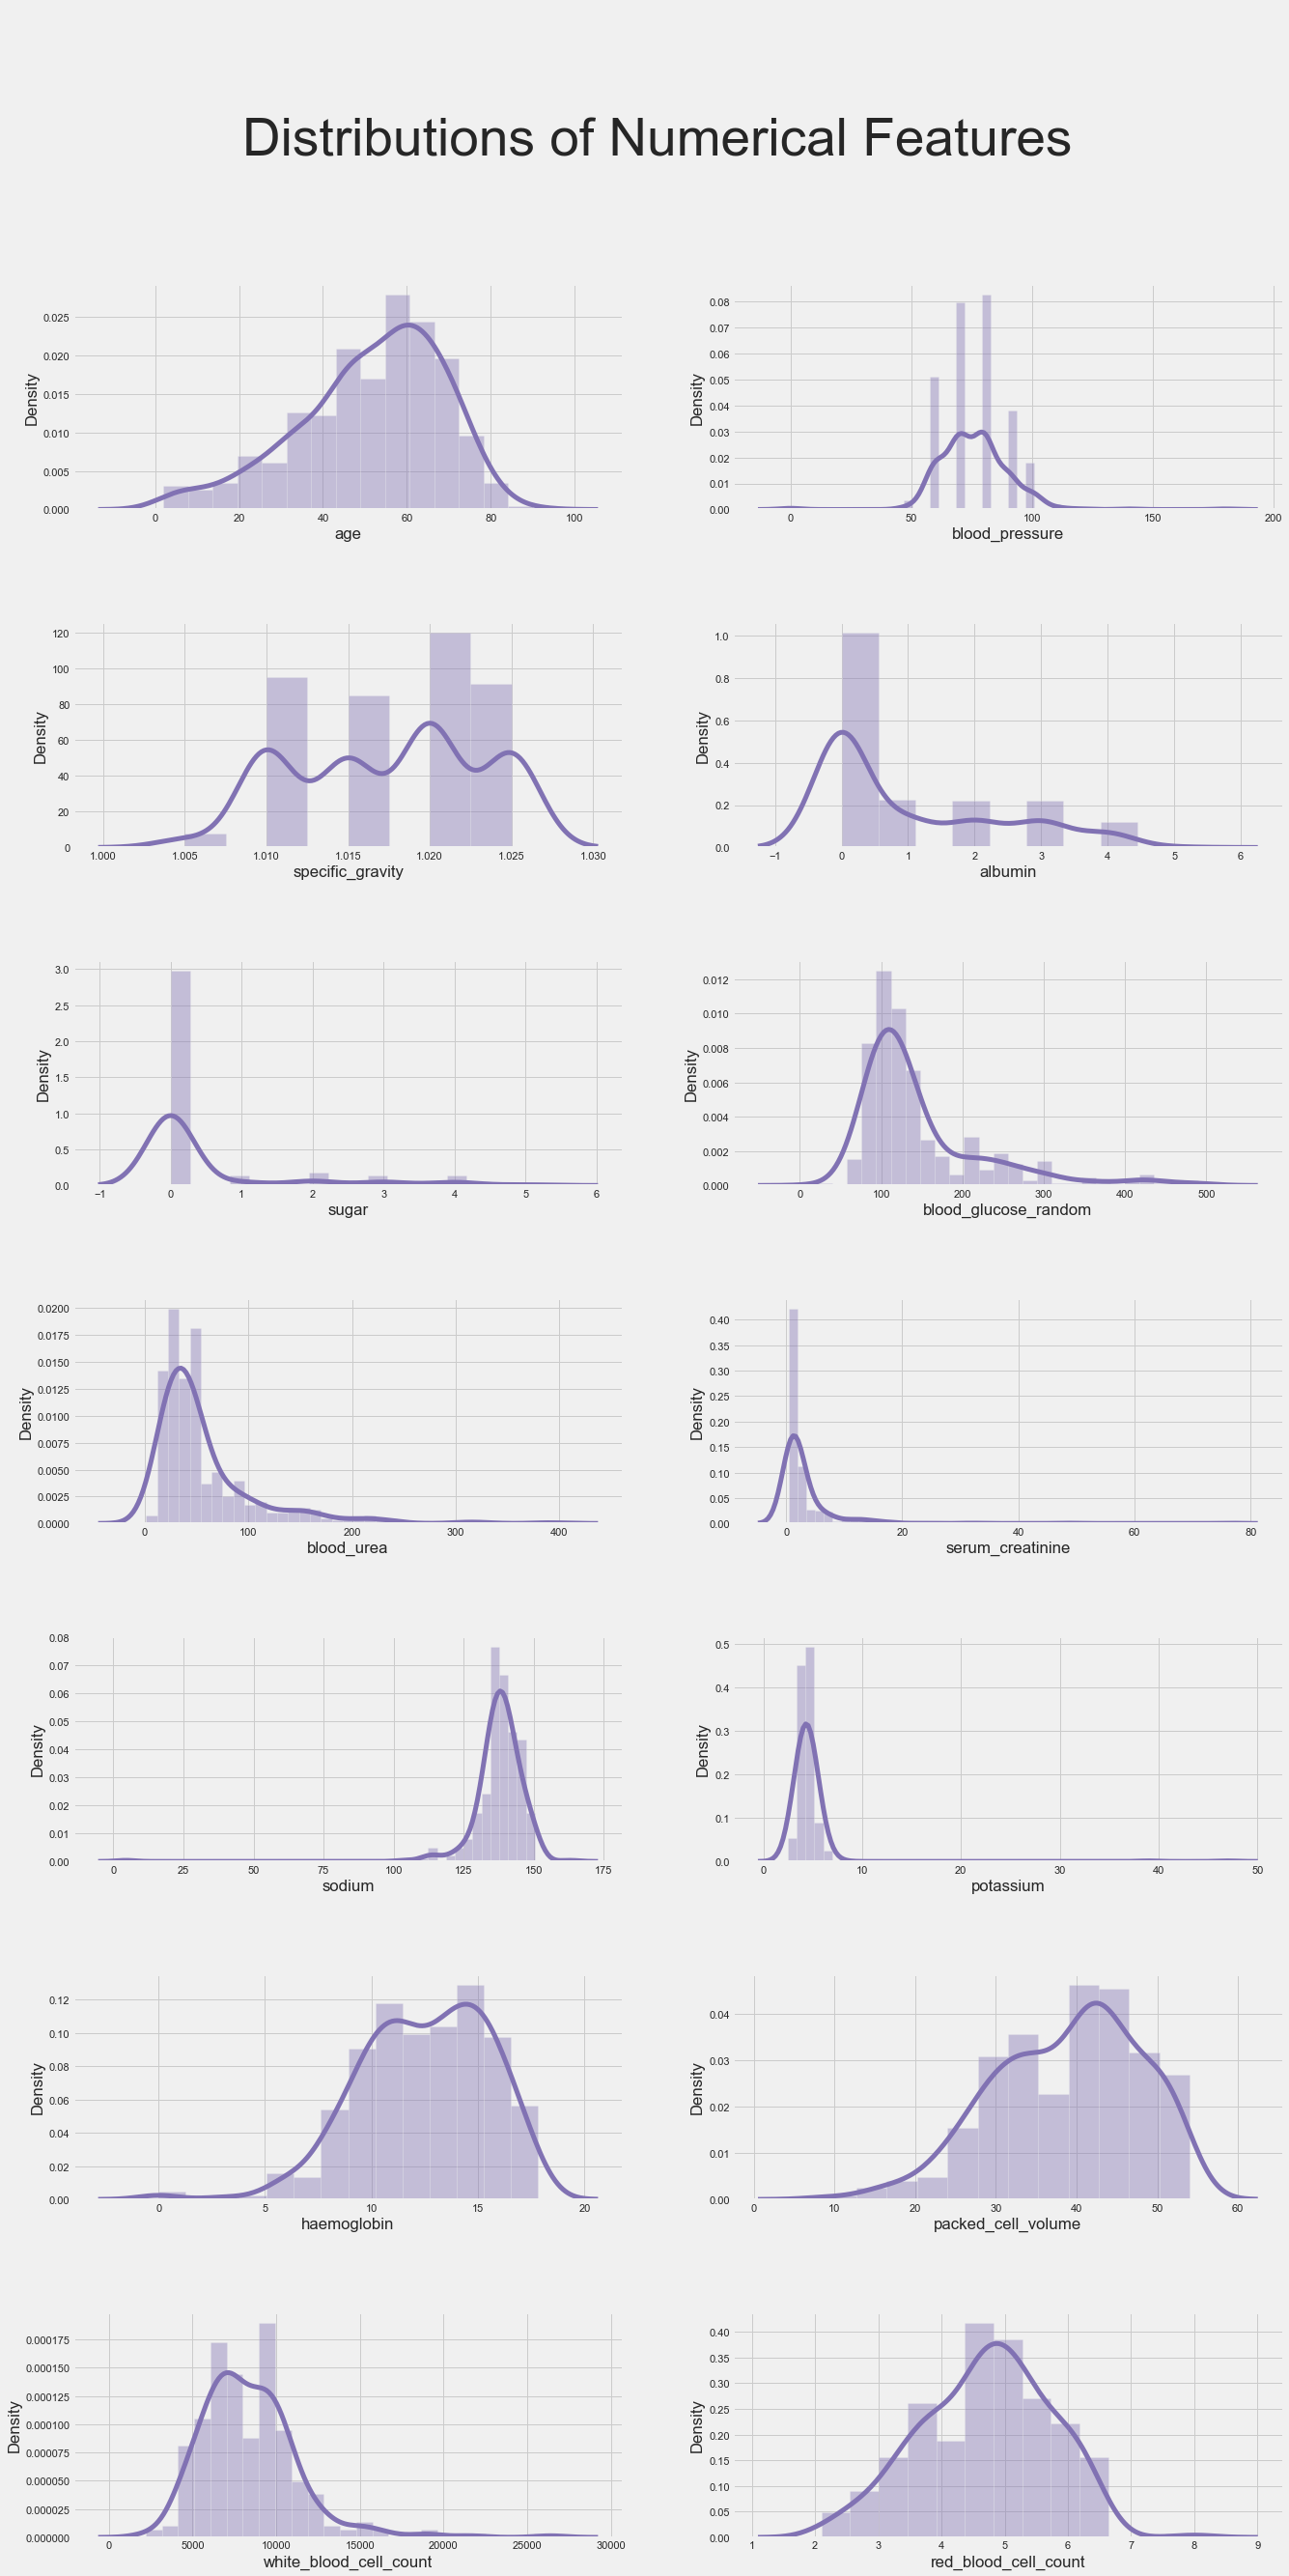

In [26]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,40))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('\n\nDistributions of Numerical Features',fontsize=55)

for ax, col in zip(axes.flatten(), col_num):
    figur = sns.distplot(a=data[col], ax=ax,color='m',kde_kws={'lw':5})

***Observation:***

- WBC Count, Potassium, Serum Cretanine, Blood Urea, Blood_glucose_random, Sugar and Albumin all these features have positively skewed sidtribution.
- Age, sodium Haemoglobin, Packed cell volume are all negatively skewed.
- Since majority of columns have skwed distribution we cannot use central tendency measures to impute their missing values.

### Checking distribution of categorical columns

In [27]:
style.use('seaborn-pastel')

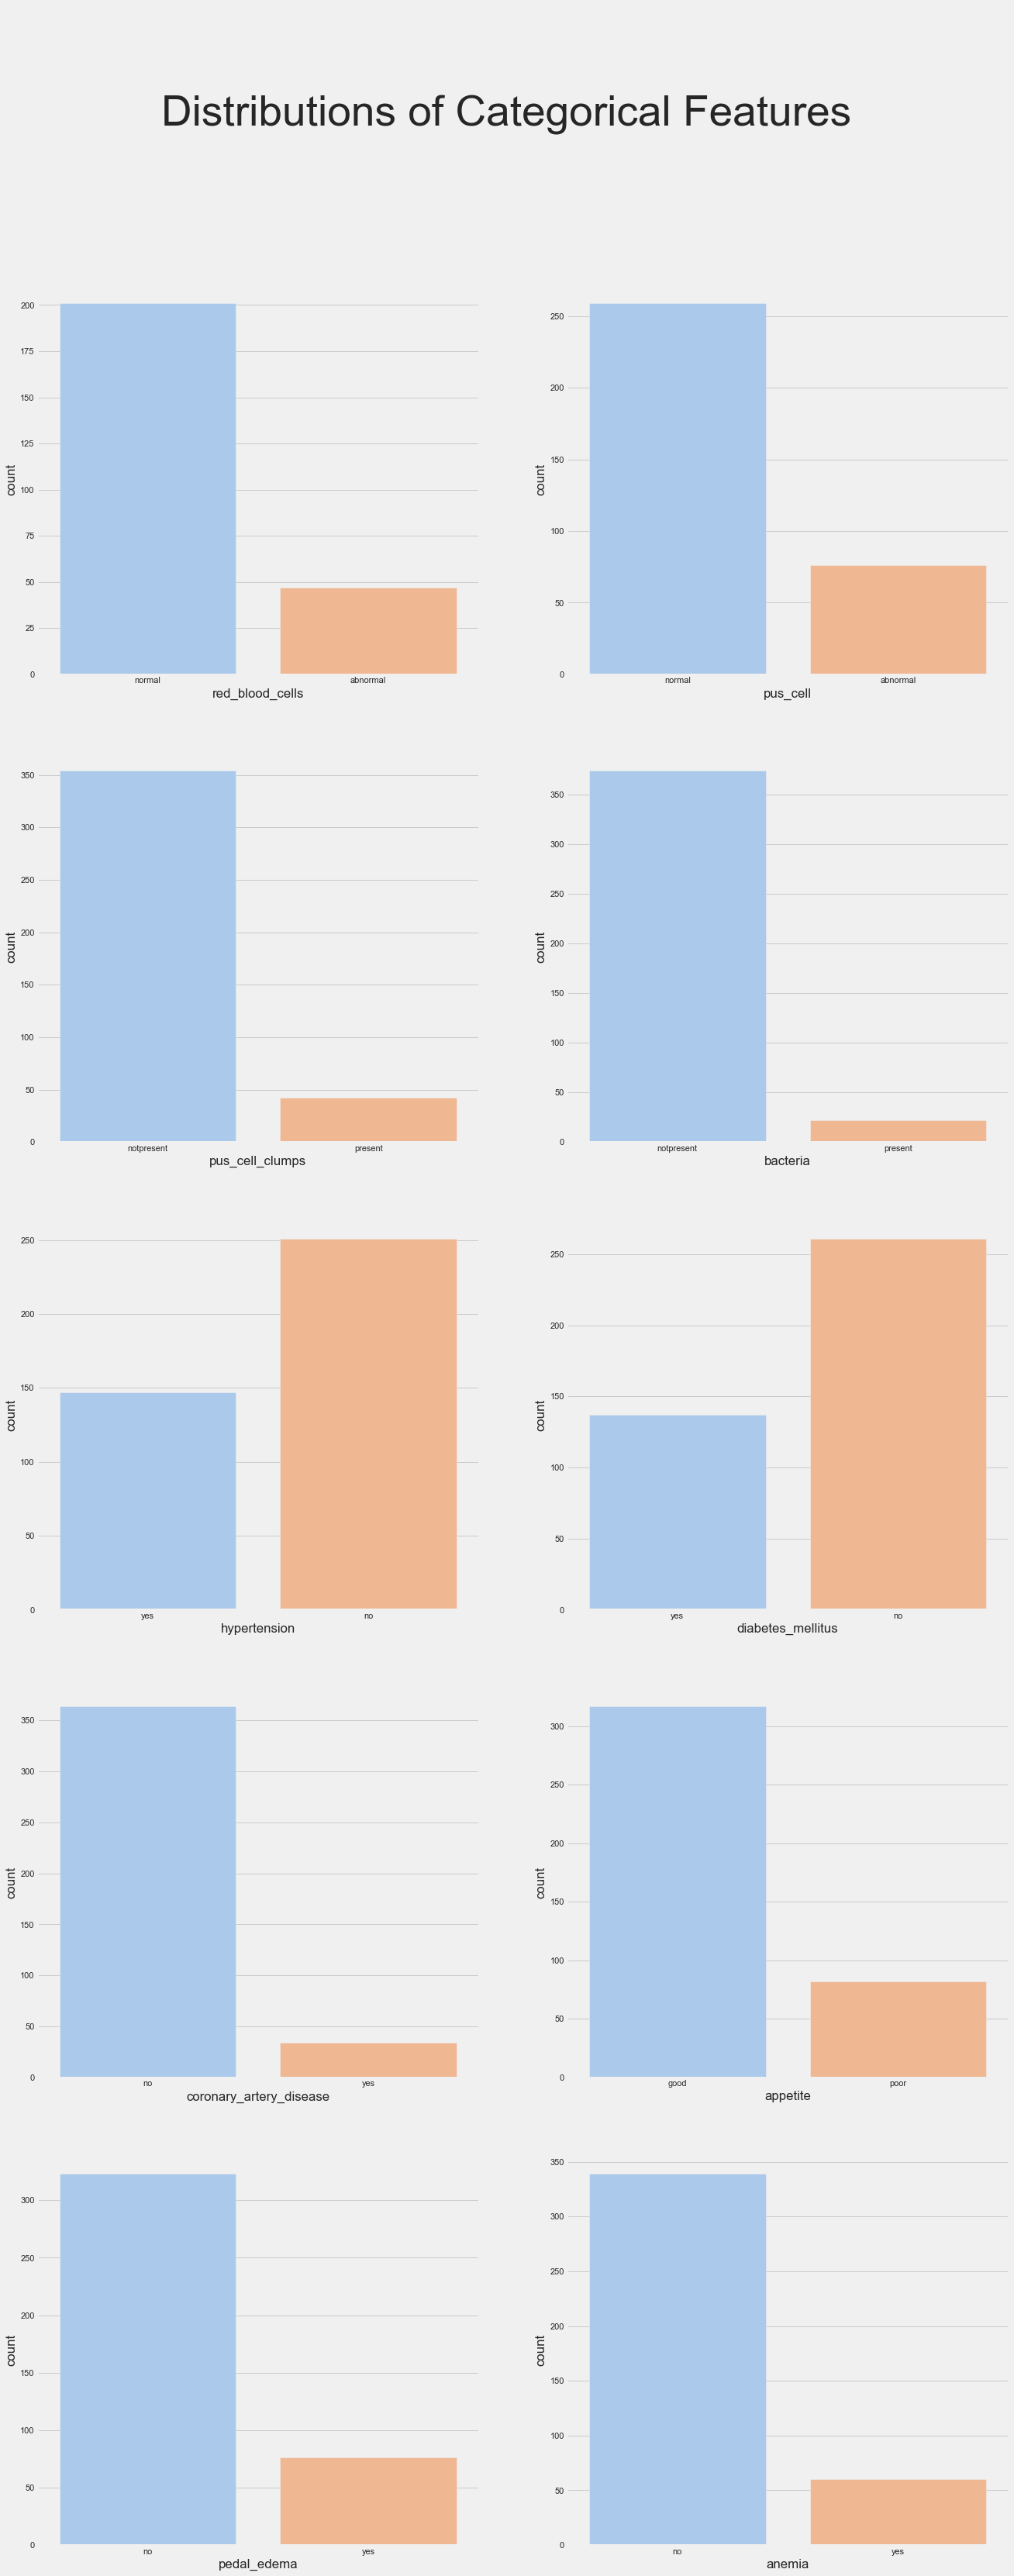

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,50))
fig.subplots_adjust(hspace=0.2)
fig.suptitle('\n\nDistributions of Categorical Features',fontsize=55)

for ax, col in zip(axes.flatten(), col_cate):
    figur = sns.countplot(x=data[col], ax=ax,
                          palette='pastel',
                          )

***Observation:***

Some features have imbalanced data. We will use startified folds during cross validation.


## Target Class Imbalance check:

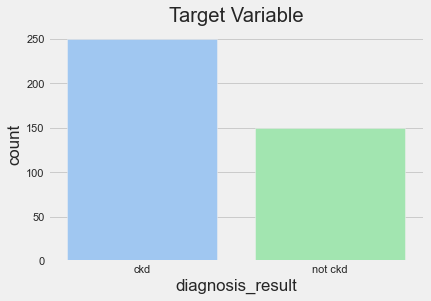

In [29]:
#histogram
sns.countplot(data['diagnosis_result'])
plt.title("Target Variable")
plt.show()

In [30]:
print('People classified as having CKD:',len(data[data['diagnosis_result']=='ckd'])/len(data['diagnosis_result'])*100,'%')
print('People classified as not having CKD:',len(data[data['diagnosis_result']=='not ckd'])/len(data['diagnosis_result'])*100,'%')

People classified as having CKD: 62.5 %
People classified as not having CKD: 37.5 %


***Observation:***

There is not much imbalance in target feature. Rebalancing not required.

## Correlation Check

In [31]:
style.use('seaborn-whitegrid')

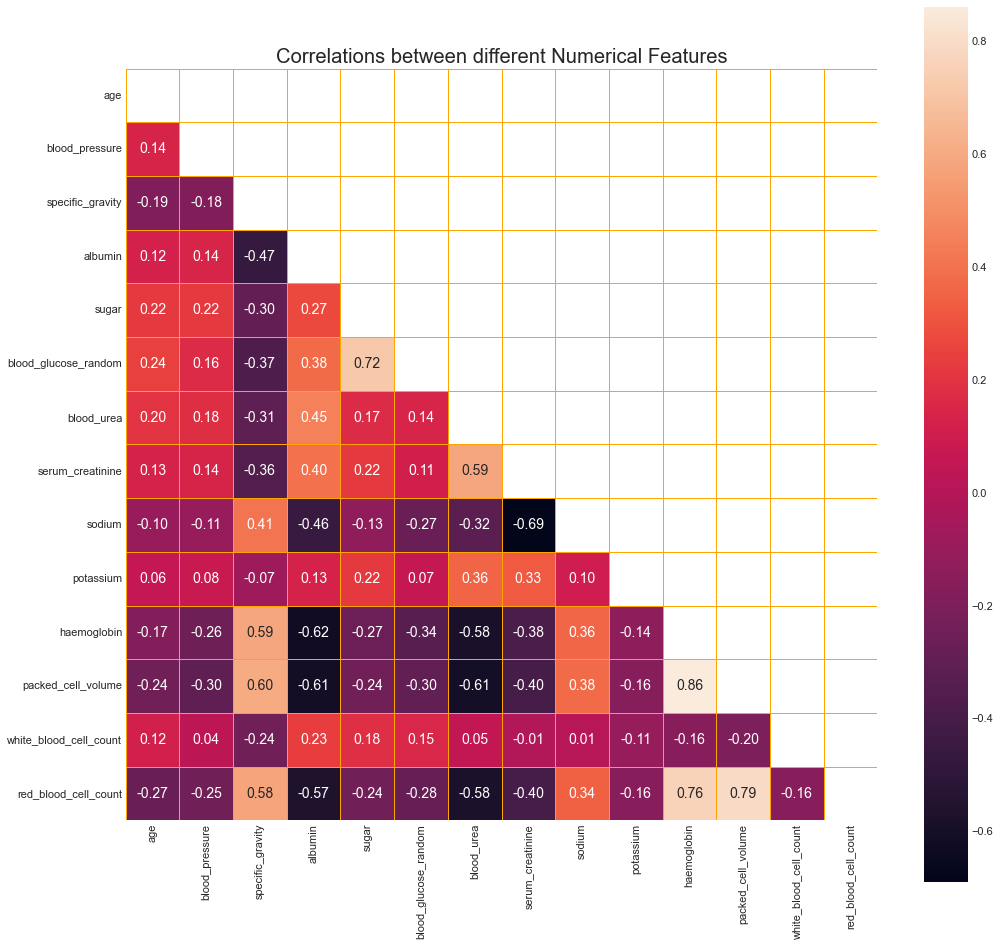

In [32]:
corr_mat=data.corr()
corr_mat_triu = corr_mat.where(np.triu(np.ones(corr_mat.shape).astype(bool),1).T)
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat_triu,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlations between different Numerical Features')
plt.show()

***Observation:***

**Strong Positive Correlation:**
- Packed cell volume --> Haemoglobin --> Red blood cell count

**Positive Correlation:**
- Specific Gravity --> Red blood cell count, Packed_cell_volume and Haemoglobin.
- Blood glucose random --> Sugar
- Serum creatinine --> Blood urea

**Negative Correlation:**
- Albumin --> Packed cell volume, Haemoglobin, Red blood cell count and Sodium
- Blood urea --> Packed cell volume, Haemoglobin, Red blood cell count and Sodium
- Specific Gravity --> Albumin
- Serum creatinine --> Sodium

***Explanation***

**Strong Positive Correlation:**
- Packed cell volume --> Haemoglobin --> Red blood cell count

*Why such strong positive correlation?-*

*Packed cell volume is a measure of the proportion of red blood cells in a given volume of whole blood. Hemoglobin is the protein molecule found in red blood cells that carries oxygen from the lungs to the tissues of the body. Red blood cell count is the number of red blood cells per unit volume of blood.*

*Since red blood cells contain hemoglobin, and their primary function is to transport oxygen from the lungs to the tissues, an increase in the number of red blood cells (RBC) and hemoglobin (Hb) concentration in the blood will result in an increase in oxygen-carrying capacity. This is reflected in the increase in the PCV value.*

*Therefore, an increase in any of these elements will result in an increase in the other two, and a decrease in any of these elements will result in a decrease in the other two.*

In [33]:
def positive_correlation(corr_matrix):
    distiguisher= ['Very Weak positive','Weak positive','Moderate positive','Strong positive',
                   'Very strong positive']
    for i,dist in zip(np.arange(0,1,0.2),distiguisher):
        feat = [cols for cols in corr_matrix.columns if any(corr_matrix[cols]>=i)]
        print(dist,'correlation')
        print(feat)
        print('-----'*10)
        

In [34]:
def negative_correlation(corr_matrix):
    distiguisher= ['Very strong negative','Strong negative','Moderate negative',
                   'Weak negative','Very Weak negative']
    for i,dist in zip(np.arange(-1,0,0.2),distiguisher):
        feat = [cols for cols in corr_matrix.columns if any(corr_matrix[cols]<=i)]
        print(dist,'correlation')
        print(feat)
        print('-----'*10)
        

In [35]:
positive_correlation(corr_mat_triu)

Very Weak positive correlation
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'haemoglobin', 'packed_cell_volume']
--------------------------------------------------
Weak positive correlation
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_urea', 'serum_creatinine', 'sodium', 'haemoglobin', 'packed_cell_volume']
--------------------------------------------------
Moderate positive correlation
['specific_gravity', 'albumin', 'sugar', 'blood_urea', 'haemoglobin', 'packed_cell_volume']
--------------------------------------------------
Strong positive correlation
['specific_gravity', 'sugar', 'haemoglobin', 'packed_cell_volume']
--------------------------------------------------
Very strong positive correlation
['haemoglobin']
--------------------------------------------------


In [36]:
negative_correlation(corr_mat_triu)

Very strong negative correlation
[]
--------------------------------------------------
Strong negative correlation
[]
--------------------------------------------------
Moderate negative correlation
['albumin', 'blood_urea', 'serum_creatinine']
--------------------------------------------------
Weak negative correlation
['specific_gravity', 'albumin', 'blood_urea', 'serum_creatinine']
--------------------------------------------------
Very Weak negative correlation
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine']
--------------------------------------------------


### Postively correlated features and their impact on diagnosis

In [37]:
import plotly.express as px

def violin(col):
    fig = px.violin(data, y=col, x="diagnosis_result", color="diagnosis_result", 
                    box=True, template = 'plotly_dark')
    return fig.show()

def scatter(col1, col2):
    fig = px.scatter(data, x=col1, y=col2, color="diagnosis_result", template = 'plotly_dark')
    return fig.show()

In [38]:
violin('haemoglobin')

In [39]:
scatter('haemoglobin','packed_cell_volume')

***Observation:***

+ Low level of hemoglobin(~13) are clearly associated with having CKD. Since we saw Haemoglobin has high correaltion with RBC count. We can infer that low level of RBC count will also result in having CKD. We can verify same with below visualizations.

- Some values are shown 0. Hemoglobin of a living being cannot be 0. These can be termed as missing value 

In [40]:
violin('red_blood_cell_count')

In [41]:
scatter('red_blood_cell_count','packed_cell_volume')

In [42]:
violin('specific_gravity')

***Observation:***
- Specific gravity(SG) does have association with having or not having CKD. 

 *Specific gravity compares density of urine to density of water.*
 
 It does seem that high level of SG(>1.02) are associated with not having the disease. A higher SG value can mean that kidney is able to filter out the waste from the blood properly.
 Similarly, a low SG value indicates improper functioning of kidney to filter waste from blood because of CKD.

In [43]:
violin('blood_urea')

In [44]:
scatter('blood_urea','serum_creatinine')

In [45]:
violin('serum_creatinine')

***Observation:***
- Blood urea level is not indicator for disease diagnosis. Sicne the distribution overlaps. Even though having CKD distribution has high variance.

- Serum creatinine can be seen as a good indicator for disease diagnosis. Low level of SC are highly associated with not having CKD.
 
***Explanation:***
 
 Creatinine is a waste product produced by muscle metabolism and is filtered out of the blood by the kidneys. In CKD, the kidneys gradually lose their ability to filter waste products from the blood, resulting in an increase in serum creatinine levels.

In [46]:
violin('blood_glucose_random')

***Observation:***
The variance of CKD is more spread out as compared with variacne of'Not CKD' but there is no clear association with diagnosis.

### Lets check some negative correlations

In [47]:
violin('albumin')

***Observation:***
- Presence of Albumin has clear association with having of CKD.

In [48]:
scatter('sodium','red_blood_cell_count')

In [49]:
violin('sodium')

In [50]:
violin('blood_urea')

In [51]:
scatter('blood_urea','red_blood_cell_count')

***Observation:***
Shows good negative correlation. increase in blood urea (>53) indicates no signs of CKD.
Since features like Haemoglobin and Packed cell volume are correlated to RBC count, they will show similar relationship. We will not plot them. 

In [52]:
scatter('serum_creatinine','sodium')

In [53]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'diagnosis_result'],
      dtype='object')

Observations:
1. High BP seems to have direct corelation with having CKD. This seems natural as high blood pressure over a period of time can damage blood vessels throughout your body, including those in the kidneys. This can reduce the blood supply to important organs like the kidneys and damage the tiny filtering units in your kidneys. As a result, the kidneys may stop removing wastes and extra fluid from your blood. The extra fluid in your blood vessels may build up and raise blood pressure even more, creating a dangerous cycle.

2. Minimum BP values is shown as 0 for some patients and BP cannot be 0 for a living person. It seems there is some error in our data.

# Data Preprocessing

### Lets impute the missing values
- Since most of the features are skewed we will not use central tendency measures to impute data.
- We will try both median imputer and KNN imputer for Numerical features. If we simple median imputer will do the job then no need to select median imputer.
- For categorical features we will use mode imputer.

In [54]:
miss_val[col_num].sort_values(ascending=False)

red_blood_cell_count      32.75
white_blood_cell_count    26.50
potassium                 22.00
sodium                    21.75
packed_cell_volume        17.75
haemoglobin               13.00
sugar                     12.25
specific_gravity          11.75
albumin                   11.50
blood_glucose_random      11.00
blood_urea                 4.75
serum_creatinine           4.25
blood_pressure             3.00
age                        2.25
dtype: float64

In [55]:
miss_val[col_cate]

red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
diagnosis_result            0.00
dtype: float64

## Imputing missing values in categorical features

##### Checking impact on distribution after imputing random values for feature pus cell and red blood cells.

<AxesSubplot:xlabel='pus_cell', ylabel='count'>

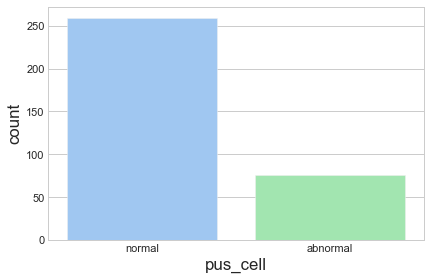

In [56]:
sns.countplot(data['pus_cell'])

In [57]:
pus_cell_result = data['pus_cell'].value_counts()
print('Percentage of people having pus cell as "Normal" before imputation',
      round(pus_cell_result['normal']/(data['pus_cell']).count(),2)*100,'%')

print('Percentage of people having pus cell as "Abormal" before imputation',
      round(pus_cell_result['abnormal']/(data['pus_cell']).count(),2)*100,'%')

Percentage of people having pus cell as "Normal" before imputation 77.0 %
Percentage of people having pus cell as "Abormal" before imputation 23.0 %


##### In case of imputing values in pus cell we will take random imputation. Let's check the influence it has on our distribution.

In [58]:
# creating a temp dataframe to check the impact of imputation.
temp_df = data[['pus_cell','red_blood_cells']]

In [59]:
# function to impuet random values
def random_value_imputation(feature):
    random_sample = temp_df[feature].dropna().sample(temp_df[feature].isna().sum())
    random_sample.index = temp_df[temp_df[feature].isnull()].index
    temp_df.loc[temp_df[feature].isnull(), feature] = random_sample

##### 1. Checking impact on distribution after imputing random values for feature red blood cell

In [60]:
random_value_imputation('pus_cell')

<AxesSubplot:xlabel='pus_cell', ylabel='count'>

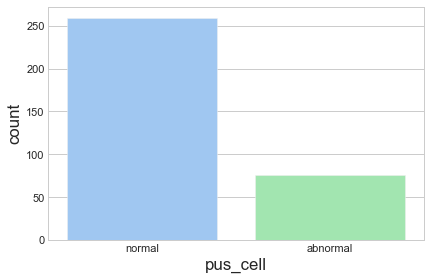

In [61]:
sns.countplot(data['pus_cell'])

In [62]:
pus_cell_result = temp_df['pus_cell'].value_counts()
print('Percentage of people having pus cell as "Normal" after imputation',
      round(pus_cell_result['normal']/(temp_df['pus_cell']).count(),2)*100,'%')

print('Percentage of people having pus cell as "Abormal" after imputation',
      round(pus_cell_result['abnormal']/(temp_df['pus_cell']).count(),2)*100,'%')

Percentage of people having pus cell as "Normal" after imputation 78.0 %
Percentage of people having pus cell as "Abormal" after imputation 22.0 %


##### There is a negligible change in distribution. We will go with this

##### 2. Checking impact on distribution after imputing random values for feature red blood cell

In [63]:
red_blood_cells_result = temp_df['red_blood_cells'].value_counts()
print('Percentage of people having red cell as "Normal" after imputation',
      round(red_blood_cells_result['normal']/(temp_df['red_blood_cells']).count(),2)*100,'%')

print('Percentage of people having red cell as "Abormal" after imputation',
      round(red_blood_cells_result['abnormal']/(temp_df['red_blood_cells']).count(),2)*100,'%')

Percentage of people having red cell as "Normal" after imputation 81.0 %
Percentage of people having red cell as "Abormal" after imputation 19.0 %


In [64]:
random_value_imputation('red_blood_cells')

In [65]:
red_blood_cells_result = temp_df['red_blood_cells'].value_counts()
print('Percentage of people having red cell as "Normal" after imputation',
      round(red_blood_cells_result['normal']/(temp_df['red_blood_cells']).count(),2)*100,'%')

print('Percentage of people having red cell as "Abormal" after imputation',
      round(red_blood_cells_result['abnormal']/(temp_df['red_blood_cells']).count(),2)*100,'%')

Percentage of people having red cell as "Normal" after imputation 81.0 %
Percentage of people having red cell as "Abormal" after imputation 19.0 %


***There is no change in distribution. We will go with random imputation for higher percent of missing values and mode imputer for lower percent of missing values.***

## Train-Test split

##### Before any imputation lets split the data into training and testing set. This is very important to do before doing imputation inorder to avoid data leakage.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = data.drop(columns='diagnosis_result',axis=1)
y = data['diagnosis_result']

In [68]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [69]:
from sklearn.impute import SimpleImputer

In [70]:
# function to impute random value in categorical data 
def random_value_imputation(feature,df):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

# function to impute mode in categorical data 
si_mode = SimpleImputer(strategy='most_frequent')

In [71]:
# removing taregt column from category column list
col_cate.remove('diagnosis_result')

In [72]:
#Imputing randomly where missing values are very high
random_value_imputation('red_blood_cells',X_train)
random_value_imputation('red_blood_cells',X_test)

random_value_imputation('pus_cell',X_train)
random_value_imputation('pus_cell',X_test)

In [73]:
# function to caluclate missing value in a df
def miss_val(df):
    return ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

In [74]:
# Imputing mode where missing values are low
X_train_cate = si_mode.fit_transform(X_train[col_cate])
X_test_cate = si_mode.fit_transform(X_test[col_cate])

In [75]:
# Converting array into df
X_train_cate = pd.DataFrame(data=X_train_cate,columns=col_cate)
X_test_cate = pd.DataFrame(data=X_test_cate,columns=col_cate)

In [76]:
miss_val(X_train_cate[col_cate])

red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
pedal_edema                0.0
anemia                     0.0
dtype: float64

In [77]:
miss_val(X_test_cate[col_cate])

red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
pedal_edema                0.0
anemia                     0.0
dtype: float64

## Imputing missing values in numerical features

In [78]:
miss_val(X_train[col_num])

red_blood_cell_count      33.7500
white_blood_cell_count    27.8125
sodium                    22.5000
potassium                 22.5000
packed_cell_volume        19.0625
haemoglobin               13.7500
blood_glucose_random      11.8750
sugar                     11.2500
albumin                   10.6250
specific_gravity          10.3125
blood_urea                 5.3125
serum_creatinine           5.3125
blood_pressure             3.1250
age                        1.5625
dtype: float64

##### Idea is to use median and knn imputer and compare the results

In [79]:
X_train[col_num].describe().T[['min','mean','50%','max']]

min         mean      50%        max
age                        2.000    51.095238    54.00     90.000
blood_pressure             0.000    75.838710    80.00    140.000
specific_gravity           1.005     1.017491     1.02      1.025
albumin                    0.000     0.996503     0.00      5.000
sugar                      0.000     0.482394     0.00      5.000
blood_glucose_random      22.000   149.343972   120.00    490.000
blood_urea                 1.500    55.720132    41.00    391.000
serum_creatinine           0.400     2.904290     1.20     48.100
sodium                   104.000   137.774194   138.00    163.000
potassium                  2.500     4.655242     4.35     47.000
haemoglobin                0.000    12.658333    12.95     17.800
packed_cell_volume        14.000    39.416988    41.00     54.000
white_blood_cell_count  2200.000  8345.021645  8000.00  26400.000
red_blood_cell_count       2.100     4.775943     4.80      8.000

##### Features like SG, Albumin, Sugar and BP are not really continous but discrete in nature.

#### There are many values in features like Blood pressure, Haemoglobin,Albumin and Sugar which are 0. We will have to check if this is a mistake or true data. We will check value of these and further also fetch their relationship in predicting target varaible.

In [80]:
# function to find zero values of a variable
def val_0(feature):
    return (X_train[feature][X_train[feature]==0].value_counts()/len(X_train[feature]))*100

In [81]:
print('Percent of values which are 0 in feature Albumin :',val_0('albumin')[0])
print('Percent of values which are 0 in feature Suagr :',val_0('sugar')[0])
print('Percent of values which are 0 in feature Haemoglobin :',val_0('haemoglobin')[0])
print('Percent of values which are 0 in feature Blood pressure :',val_0('blood_pressure')[0])

Percent of values which are 0 in feature Albumin : 50.625
Percent of values which are 0 in feature Suagr : 72.5
Percent of values which are 0 in feature Haemoglobin : 0.3125
Percent of values which are 0 in feature Blood pressure : 0.625


##### In features like Sugar and Albumin value zero is a true condition rather than an anomoly . Infact in both of these features zero is associated with not having CKD.

##### But in case of Haemoglobin and Blood pressure we will treat 0 as missing value. Also, these terms cannot be zero for a living being.

In [82]:
X_train['blood_pressure'][X_train['blood_pressure']==0] = np.nan
X_test['blood_pressure'][X_test['blood_pressure']==0] = np.nan

In [83]:
X_train['haemoglobin'][X_train['haemoglobin']==0] = np.nan
X_test['haemoglobin'][X_test['haemoglobin']==0] = np.nan

## Imputing missing values

#### Using Median imputer

In [84]:
si_median = SimpleImputer(strategy='median')

In [85]:
# creating a temp df to check the impact on distribtion by imputing using Median.
temp = X_train[col_num][['red_blood_cell_count','age','sodium','haemoglobin','albumin','blood_urea']]

In [86]:
temp_median = si_median.fit_transform(temp)

In [87]:
temp_median = pd.DataFrame(temp_median,columns=temp.columns)

# Log regres

y_temp_train = y_train
y_temp_test = y_test

y_temp_train = y_temp_train.map({'ckd':1,'not ckd':0})
y_temp_test = y_temp_test.map({'ckd':1,'not ckd':0})

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score,precision_score

accuracy = []
recall = []

for i in range(1,35):
    
    temp_df = X_train[col_num]
    temp_df_test =  X_test[col_num]
    
    knnimp = KNNImputer(n_neighbors=i,weights='distance')
    scaler = StandardScaler()

    temp_df = scaler.fit_transform(temp_df)
    temp_df_test = scaler.transform(temp_df_test)

    temp_df = pd.DataFrame(temp_df,columns=col_num)
    temp_df_test = pd.DataFrame(temp_df_test,columns=col_num)

    temp_df = knnimp.fit_transform(temp_df)
    temp_df_test = knnimp.transform(temp_df_test)

    temp_df = pd.DataFrame(temp_df,columns=col_num)
    temp_df_test = pd.DataFrame(temp_df_test,columns=col_num)
    
    logr = LogisticRegression()
    logr.fit(temp_df,y_temp_train)
    
    y_pred = logr.predict(temp_df_test)
    accuracy.append((i,accuracy_score(y_temp_test,y_pred)))
    recall.append((i,recall_score(y_temp_test,y_pred)))


#### Using KNN Imputer

In [88]:
from sklearn.impute import KNNImputer 

In [89]:
knnimp = KNNImputer(n_neighbors=8,weights='distance')

In [90]:
# creating a temp df
temp_df = X_train[col_num]
temp_df.head(2)

age  blood_pressure  specific_gravity  albumin  sugar  \
380  59.0            60.0             1.020      0.0    0.0   
56   76.0            70.0             1.015      3.0    4.0   

     blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  \
380                 113.0        23.0               1.1   139.0        3.5   
56                    NaN       164.0               9.7   131.0        4.4   

     haemoglobin  packed_cell_volume  white_blood_cell_count  \
380         15.3                54.0                  6500.0   
56          10.2                30.0                 11300.0   

     red_blood_cell_count  
380                   4.9  
56                    3.4

Since knn is distance based imputation tehcnique we need to bring all values to same scale before imputing 

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()

In [93]:
temp_scaled = scaler.fit_transform(temp_df)
temp_scaled = pd.DataFrame(temp_scaled,columns=col_num)

temp_knn = knnimp.fit_transform(temp_scaled)
temp_knn = pd.DataFrame(temp_knn,columns=col_num)

In [94]:
# function to plot distribution with and iwthout imputation by using both KNN and Median imputation
def distribution(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28,10))
    fig.suptitle('Change in Distributions by KNN and Median Imputation',fontsize=30)

    fig1 = sns.distplot(a=X_train[feature],color='lightblue',kde_kws={'lw':8},ax=axes[0],label='Without Imptation')
    fig1 = sns.distplot(a=temp_median[feature],color='salmon',kde_kws={'lw':2},ax=axes[0],label='Imputation by Median')
    
    fig2 = sns.distplot(a=temp_scaled[feature],color='lightblue',kde_kws={'lw':8},ax=axes[1],label='Without Imptation')
    fig2 = sns.distplot(a=temp_knn[feature],color='salmon',kde_kws={'lw':2},ax=axes[1],label='Imputation by KNN')
    
    fig1=fig1.legend(loc='best', fontsize=20)
    fig2=fig2.legend(loc='best', fontsize=20)
    
    plt.show()

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score

### Checking the distribution with increasing order of missing value.

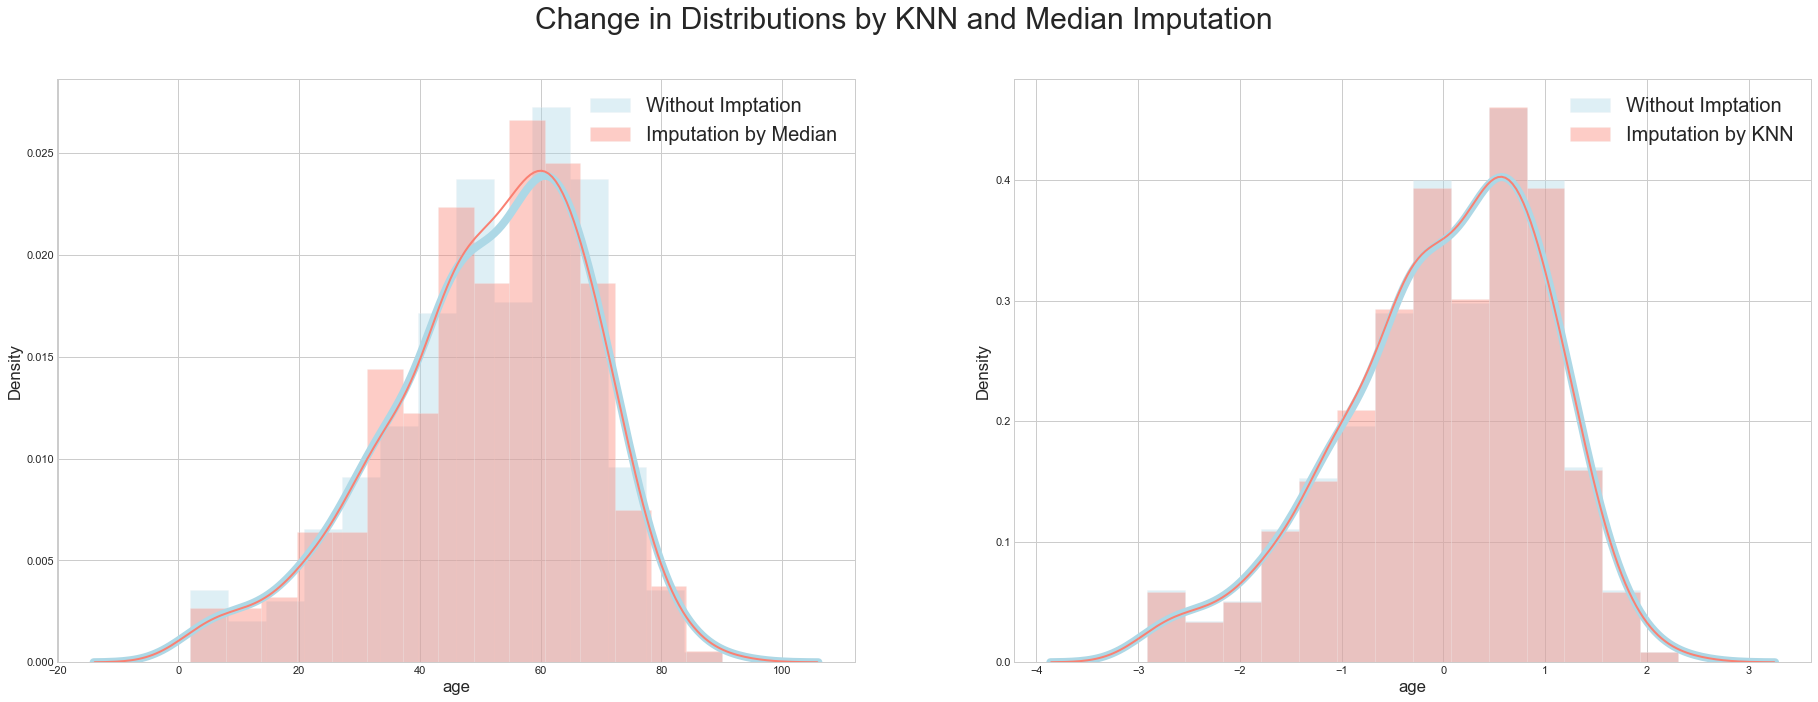

In [96]:
distribution('age')

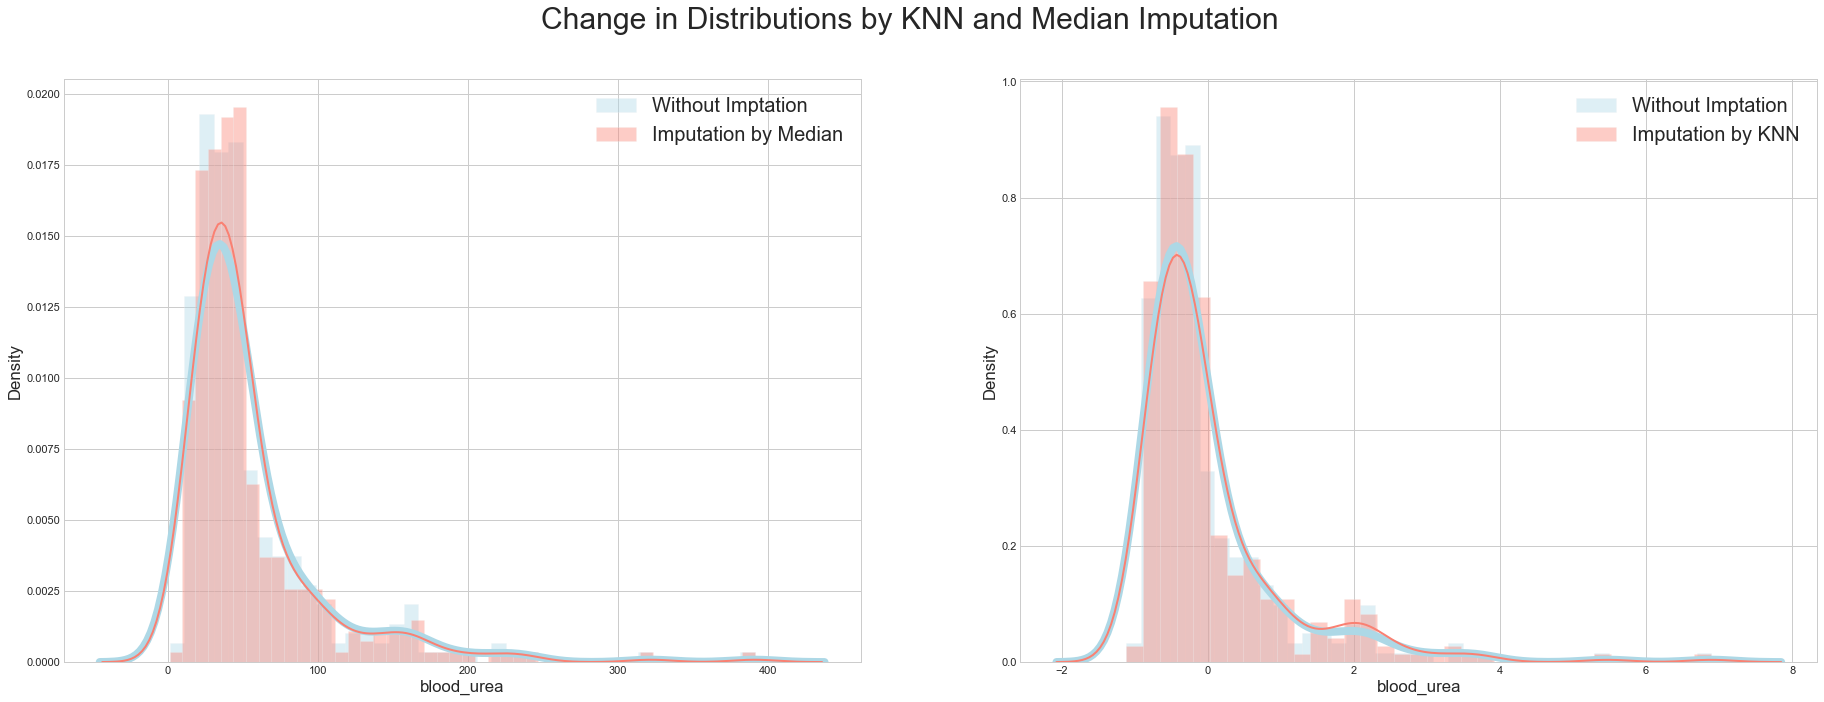

In [97]:
distribution('blood_urea')

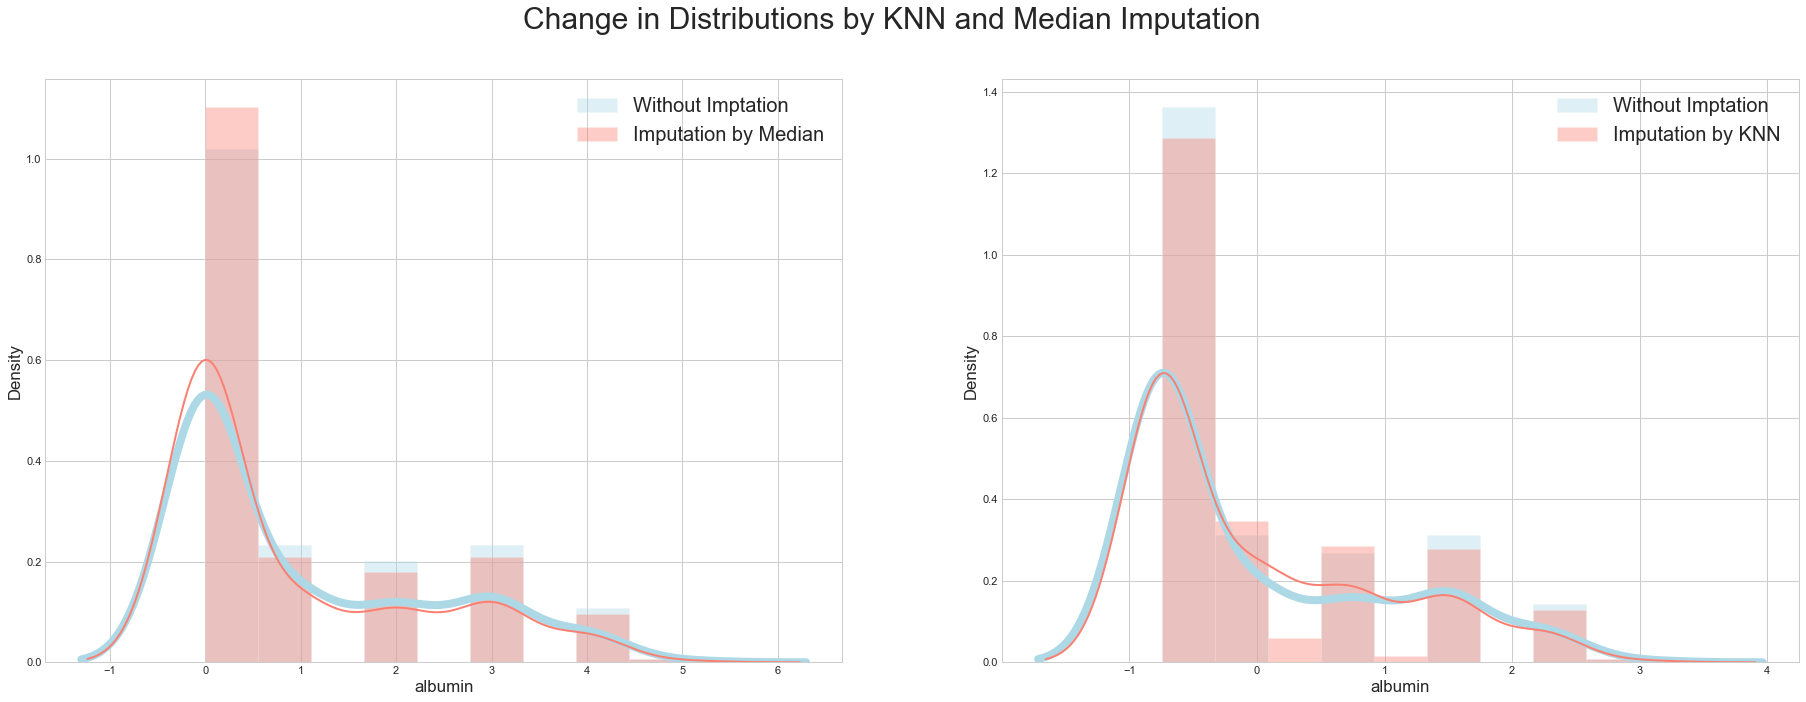

In [98]:
distribution('albumin')

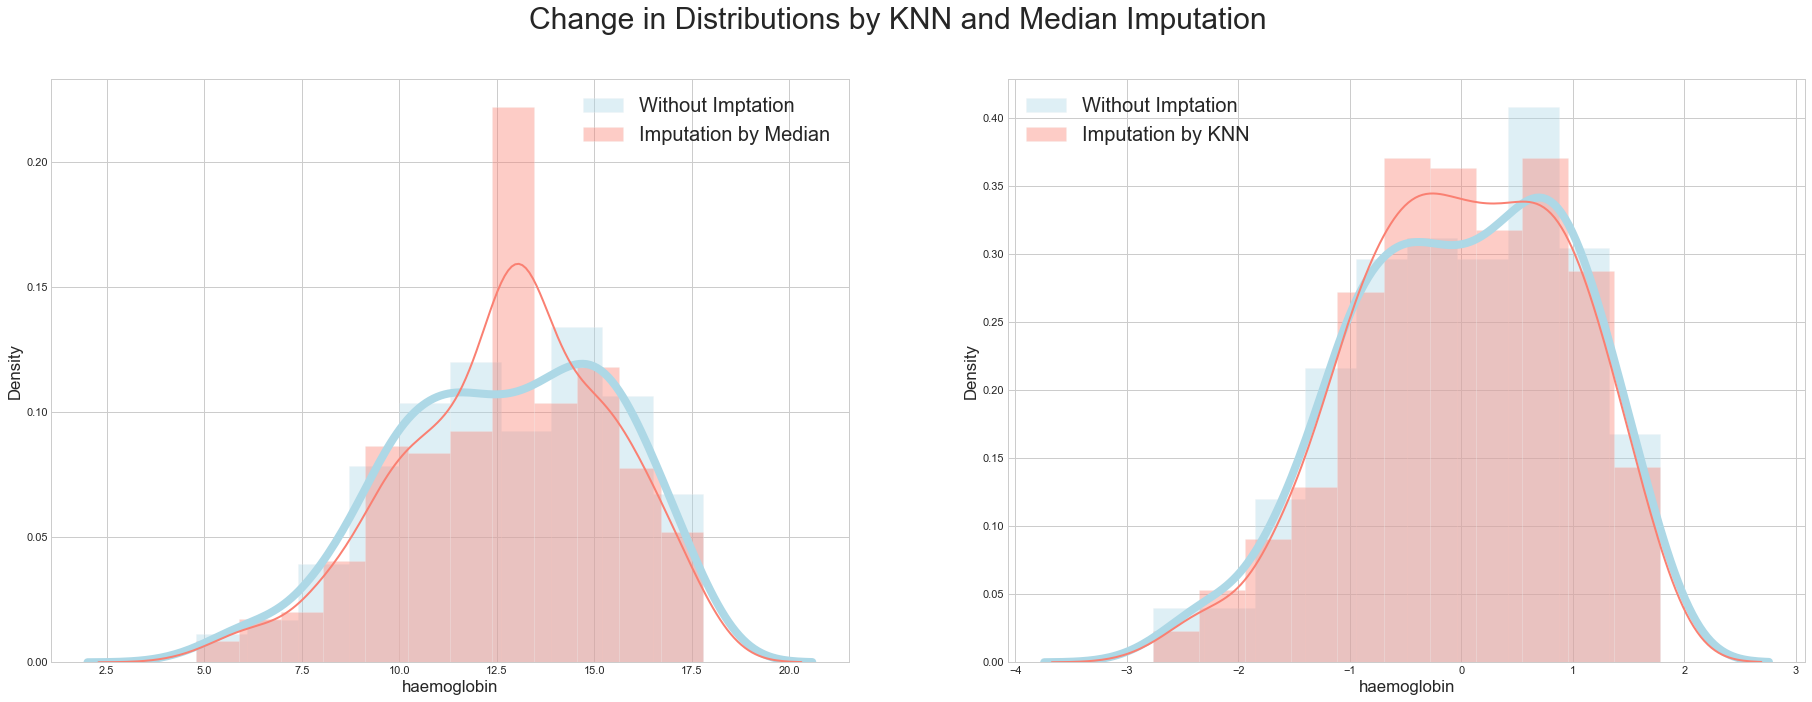

In [99]:
distribution('haemoglobin')

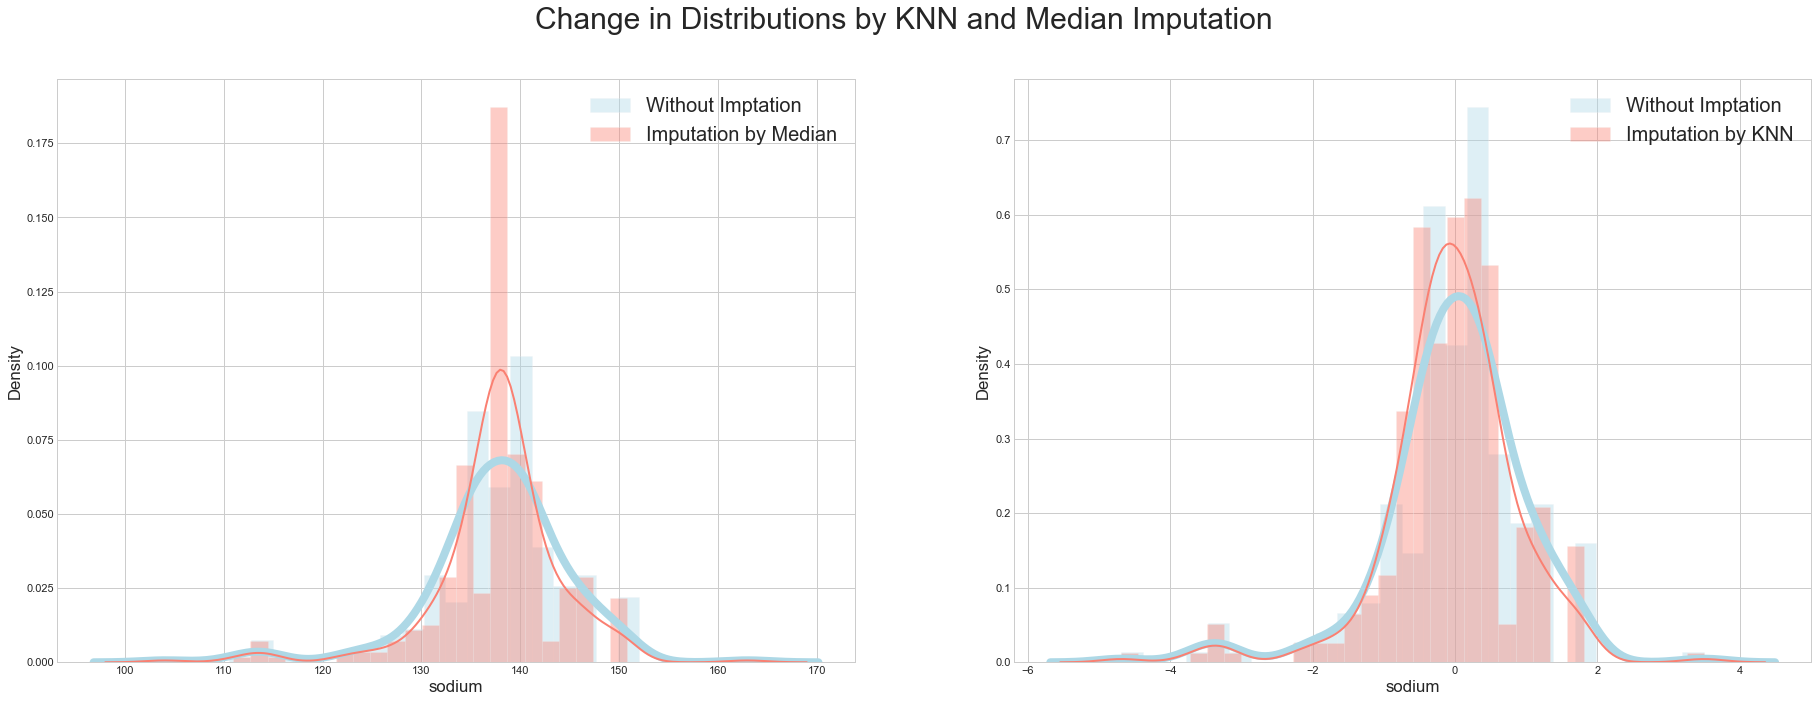

In [100]:
distribution('sodium')

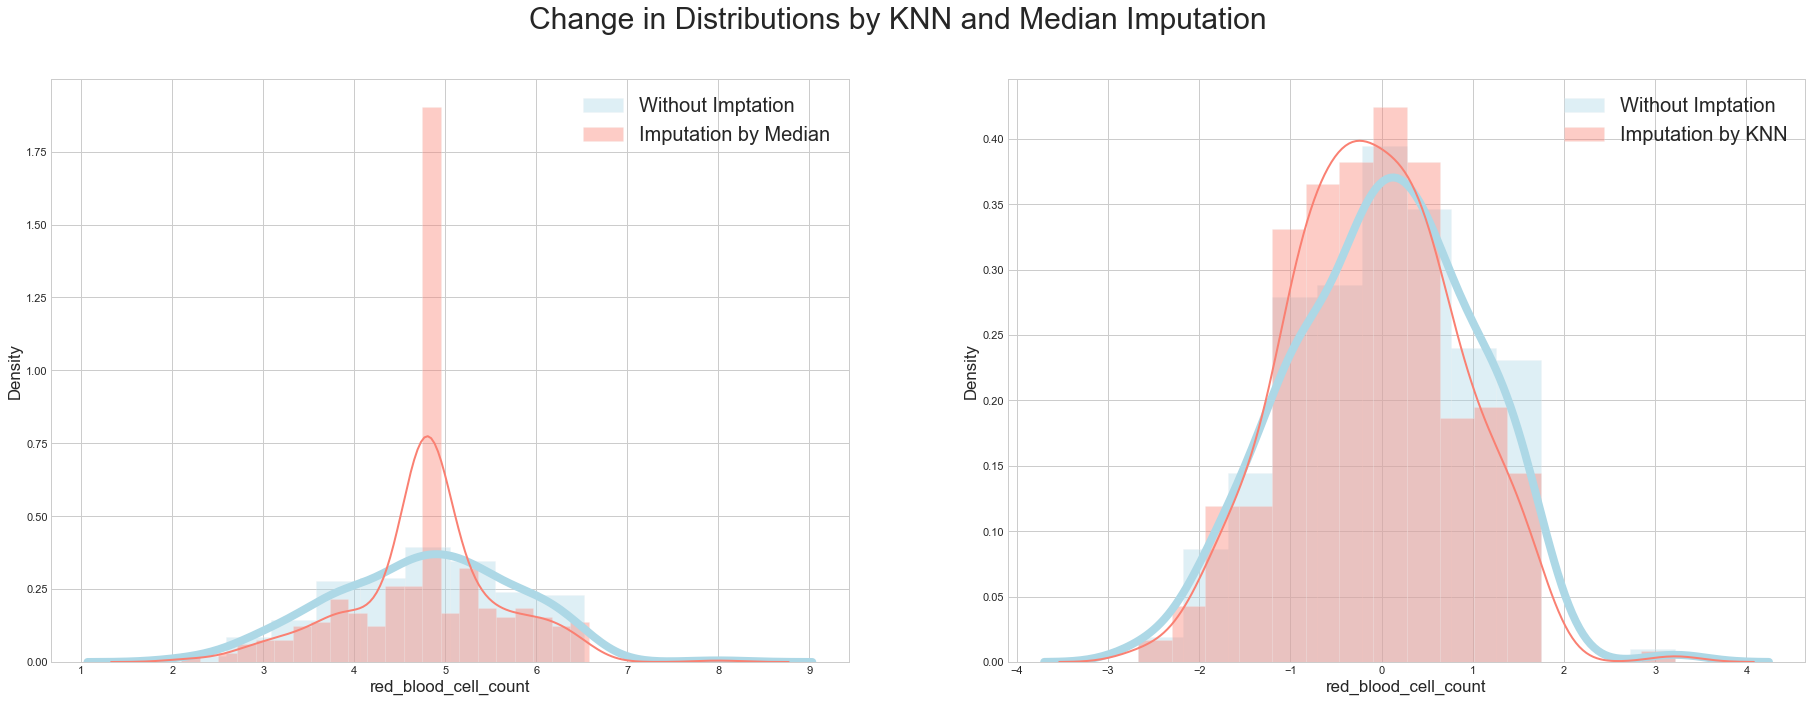

In [101]:
distribution('red_blood_cell_count')

It is clear that with missing values higher than 13% imputing median will have great impact on the distribution. In somecases completely changing the ditribtion because of high number of missing values. 

KNN in the other hand has maintained the distribution plot in many cases. It is indeed hindering the distribution in case of where missing value are more than 14%. But that will do.

Lets proceed with KNN to impute missing values

Lets check which value of knn works better.

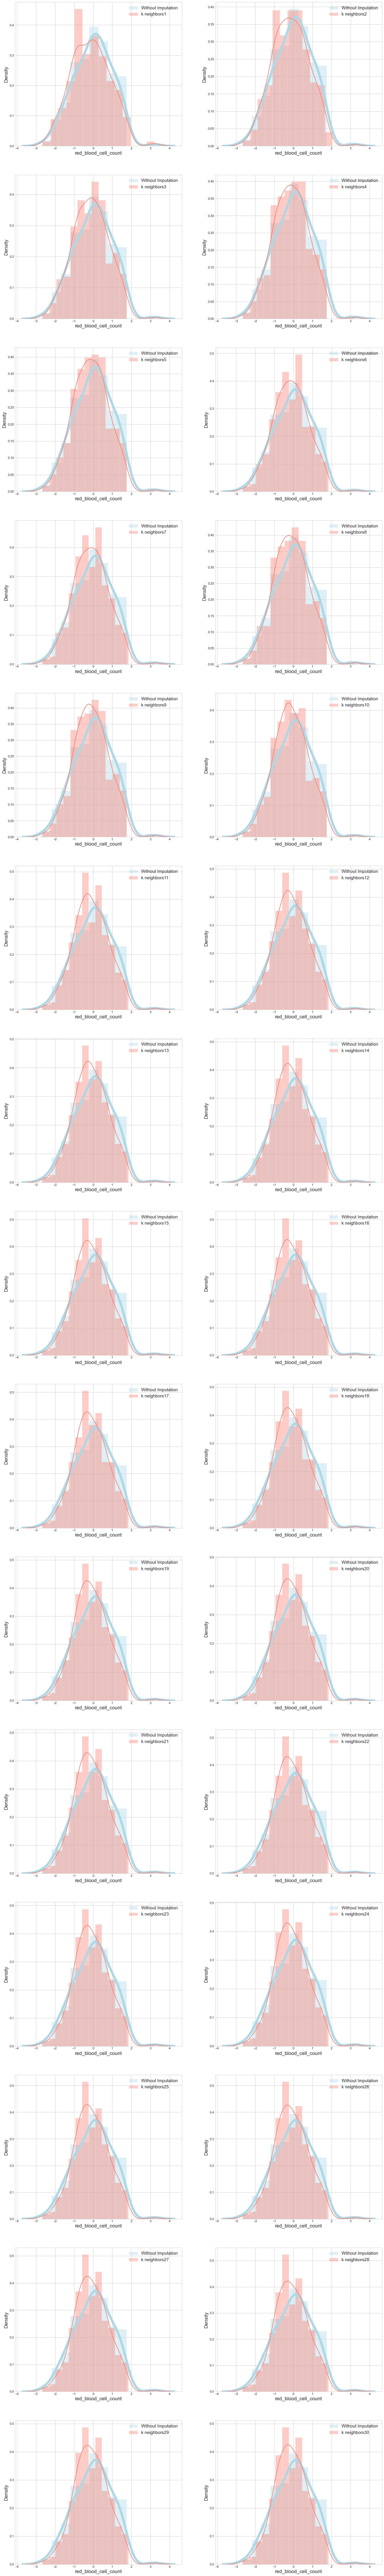

In [102]:
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(20,150))

for ax,i in zip(axes.flatten(),range(1,31)):
    knnimp = KNNImputer(n_neighbors=i,weights='distance')

    temp_knn = knnimp.fit_transform(temp_scaled)
    temp_knn = pd.DataFrame(temp_knn,columns=col_num)

    fig2 = sns.distplot(a=temp_scaled['red_blood_cell_count'],color='lightblue',kde_kws={'lw':8},ax=ax,label='Without Imputation')
    fig2 = sns.distplot(a=temp_knn['red_blood_cell_count'],color='salmon',kde_kws={'lw':2},ax=ax,label=f'k neighbors{i}')
    
    fig2=fig2.legend(loc='best', fontsize=15)

We will procced with neighbors as 8. Any value between 5 to 9 is having similar impact on distribution

# imputing missing values using KNN

In [104]:
# Train and test set for numerical columns
X_train_num = X_train[col_num]
X_test_num = X_test[col_num]

In [107]:
scaler = StandardScaler()

In [108]:
X_train_num_scaled = scaler.fit_transform(X_train_num)

X_train_num_scaled = pd.DataFrame(X_train_num_scaled,columns=col_num)

In [109]:
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled = pd.DataFrame(X_test_num_scaled,columns=col_num)

In [110]:
knnimp = KNNImputer(weights='distance',n_neighbors=8)

In [111]:
X_train_num_knn = knnimp.fit_transform(X_train_num_scaled)

X_train_num = pd.DataFrame(X_train_num_knn,columns=col_num)


In [112]:
X_test_num_knn = knnimp.transform(X_test_num_scaled)

X_test_num = pd.DataFrame(X_test_num_knn,columns=col_num)

In [113]:
X_train_num[X_train_num.isna()].count()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [114]:
X_test_num[X_test_num.isna()].count()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

### We have imputed both train and test data

Before merging the numerical and categorical columns. Lets encode the categorical data to numerical values

In [115]:
#one hot encoder
X_train_cate = pd.get_dummies(X_train_cate,drop_first=True)
X_test_cate = pd.get_dummies(X_test_cate,drop_first=True)
# there is no increase in dimensionality since all categoiral columns had only two values

Lets merge the numerical and categorical columns

In [116]:
X_train = pd.concat([X_train_num,X_train_cate],axis=1)
X_test = pd.concat([X_test_num,X_test_cate],axis=1)

In [117]:
# encoding text data in taret variable
y_train = y_train.map({'ckd':1,'not ckd':0})
y_test = y_test.map({'ckd':1,'not ckd':0})

# Model Building

In [118]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

## Decision Tree Classifier

In [119]:
# decision tree parameters for grid search cv
param = {
    'max_depth' : [3, 5, 7, 10],
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [2, 3, 5, 7],
    'min_samples_split' : [2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

#decision tree object instantiation
dt = DecisionTreeClassifier(random_state=42)

# Grid search CV object instantiation
gscv = GridSearchCV(estimator=dt,param_grid=param,cv = 10,verbose=1)

# Fitting data to Grid search CV object
gscv.fit(X_train,y_train)

# Predicting target variable
y_pred_dt = gscv.predict(X_test)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


In [120]:
print('Best Parameters:\n',gscv.best_params_)

Best Parameters:
 {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [121]:
# fitting best parameters to decision tree classifier for prediction
dt = DecisionTreeClassifier(criterion='entropy',max_depth=7,max_features='auto',min_samples_leaf=2,min_samples_split=2,
                           splitter='best',random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       min_samples_leaf=2, random_state=42)

In [122]:
# Cross validated accuracy scores for train and test set

dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',min_samples_leaf=5,min_samples_split=2,
                           splitter='best',random_state=42)

# accuracy score
scores_train = cross_val_score(dt, X_train, y_train, cv=10)
scores_test = cross_val_score(dt, X_test, y_test, cv=10)

# Mean of 10 fold cross validated score
accuracy_dt_train = np.mean(scores_train)
accuracy_dt_test = np.mean(scores_test)

print('Accuracy score for the Decision Tree model on train data is:',round(accuracy_dt_train*100,2),'%')
print('Accuracy score for the Decision Tree model on test data is:',round(accuracy_dt_test*100,2),'%')

Accuracy score for the Decision Tree model on train data is: 97.19 %
Accuracy score for the Decision Tree model on test data is: 95.0 %


In [123]:
print('Classification report:\n',classification_report(y_test,y_pred_dt))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_dt))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion matrix:
 [[30  0]
 [ 0 50]]


***Observation***

- Cross validated accuracy score shows more realistic value of accuracy. This is mainly because we have a very small dataset. Classifier like decision trees tend overfit smaller datasets. We will observe same thing in case of random forest also.
- Classification report does do not justice to such small datasets. It's showing 100% accuracy.
A nested Classification report which gives the report for each cross validated set would be a much better option here.

In [124]:
# Function to print classification report for each fold cross validation set
def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) 
    print('----'*15)
    
    # return accuracy score
    return accuracy_score(y_true, y_pred) 

In [125]:
# Classifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='auto',min_samples_leaf=5,min_samples_split=2,
                           splitter='best',random_state=42)

# Nested CV with parameter optimization

nested_score = cross_val_score(dt, X_test, y=y_test, cv=10,
               scoring=make_scorer(classification_report_with_accuracy_score))
print('Accuracy score for the Decision Tree model on test data is:',round(nested_score.mean()*100,2),'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   mac

#### This more accurate report. This is natural to happen with tree based algorithm on such small dataset.

## Logistic Regression

In [126]:
# object instantiation
logr = LogisticRegression()

#fitting model for prediction
logr = logr.fit(X_train, y_train)

# Predicting target variable
y_pred = logr.predict(X_test)

In [127]:
# Cross validated accuracy scores for train and test set
logr = LogisticRegression()

# accuracy score
scores_train = cross_val_score(logr, X_train, y_train, cv=10)
logr = LogisticRegression()
scores_test = cross_val_score(logr, X_test, y_test, cv=10)

# Mean of 10 fold cross validated score
accuracy_logr_train = np.mean(scores_train)
accuracy_logr_test = np.mean(scores_test)

print('Accuracy score for the Logistic Regression model on train data is:',round(accuracy_logr_train*100,2),'%')
print('Accuracy score for the Logistic Regression model on test data is:',round(accuracy_logr_test*100,2),'%')

Accuracy score for the Logistic Regression model on train data is: 98.44 %
Accuracy score for the Logistic Regression model on test data is: 97.5 %


In [128]:
# Classifier
logr = LogisticRegression()

# Nested CV with parameter optimization

nested_score = cross_val_score(logr, X_test, y=y_test, cv=10,
               scoring=make_scorer(classification_report_with_accuracy_score))
print('Accuracy score for the Decision Tree model on test data is:',round(nested_score.mean()*100,2),'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   mac

### Logistic regression model is performing much better.
**Reasoning**
- As we also observed during plotting of data. The relationship between features and target variable is linear in nature. Logistic regression model works best for linear data.
- We have only 400 observations. Decision tree are best suited for large number of observations, in small datasets they tend to overfit whereas logistic regression model thrives and can handle small datasets.
- The binary nature of target variable suits best for logistic regression models.

# Random Forest Classifier

In [129]:
# random forest parameters for grid search cv
param = {'n_estimators':[50,100,150],
    'max_depth' : [3, 5, 7, 10],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [2, 3, 5, 7],
    'min_samples_split' : [2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

# object instantiation
rf = RandomForestClassifier()

# Grid search CV object instantiation
gscv = GridSearchCV(estimator=rf,param_grid=param,cv = 10,verbose=1)

# Fitting data to Grid search CV object
gscv.fit(X_train,y_train)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [130]:
print('Best Parameters:\n',gscv.best_params_)

Best Parameters:
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [164]:
# fitting best parameters to random forest classifier for prediction
rf = RandomForestClassifier(criterion= 'gini', max_depth= 3, max_features= 'auto',
                            min_samples_leaf= 2, min_samples_split= 2, n_estimators= 50)

# accuracy score
scores_train = cross_val_score(rf, X_train, y_train, cv=10)
scores_test = cross_val_score(rf, X_test, y_test, cv=10)

# Mean of 10 fold cross validated score
accuracy_rf_train = np.mean(scores_train)
accuracy_rf_test = np.mean(scores_test)

print('Accuracy score for the Random Forest model on train data is:',round(accuracy_rf_train*100,2),'%')
print('Accuracy score for the Random Forest model on test data is:',round(accuracy_rf_test*100,2),'%')

Accuracy score for the Random Forest model on train data is: 97.81 %
Accuracy score for the Random Forest model on test data is: 97.5 %


In [165]:
# Classifier
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'auto',
                            min_samples_leaf= 5, min_samples_split= 5, n_estimators= 100)

# Nested CV with parameter optimization

nested_score = cross_val_score(rf, X_test, y=y_test, cv=10,
               scoring=make_scorer(classification_report_with_accuracy_score))
print('Accuracy score for the Random Forest Classifier model on test data is:',round(nested_score.mean()*100,2),'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   mac

## SVC

In [133]:
# SVM parameters for grid search cv
param = {
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.001,0.0001],
    'kernel':['linear', 'rbf', 'sigmoid','poly']
              }
# object instantiation
svc = SVC()

# Grid search CV object instantiation
gscv = GridSearchCV(estimator=svc,param_grid=param,cv = 10,verbose=1)

# Fitting data to Grid search CV object
gscv.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             verbose=1)

In [134]:
print('Best Parameters:\n',gscv.best_params_)

Best Parameters:
 {'C': 10, 'gamma': 1, 'kernel': 'linear'}


Kernel is selected as linear. Since there is linear relationship between features and target variable.

In [135]:
# fitting best parameters to SVC for prediction
svc = SVC(C=10,gamma=1,kernel='linear')

# Fitting data to model
svc = svc.fit(X_train, y_train)

# Predicting target variable
y_pred_sv = svc.predict(X_test)

In [136]:
# fitting best parameters to SVM classifier for prediction
svc = SVC(C=1,gamma=1,kernel='linear')

# accuracy score
scores_train = cross_val_score(svc, X_train, y_train, cv=10)
scores_test = cross_val_score(svc, X_test, y_test, cv=10)

# Mean of 10 fold cross validated score
accuracy_svc_train = np.mean(scores_train)
accuracy_svc_test = np.mean(scores_test)

print('Accuracy score for the SVM model on train data is:',round(accuracy_svc_train*100,2),'%')
print('Accuracy score for the SVM model on test data is:',round(accuracy_svc_test*100,2),'%')

Accuracy score for the SVM model on train data is: 98.44 %
Accuracy score for the SVM model on test data is: 97.5 %


In [137]:
# Classifier
svc = SVC(C=1,gamma=1,kernel='linear')

# Nested CV with parameter optimization

nested_score = cross_val_score(svc, X_test, y=y_test, cv=10,
               scoring=make_scorer(classification_report_with_accuracy_score))
print('Accuracy score for the SVM model on test data is:',round(nested_score.mean()*100,2),'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   mac

# KNN

In [138]:

Error_rate = []
# checking error rate from 1 to 40 neighbors
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    Error_rate.append(np.mean(y_pred_knn!=y_test))

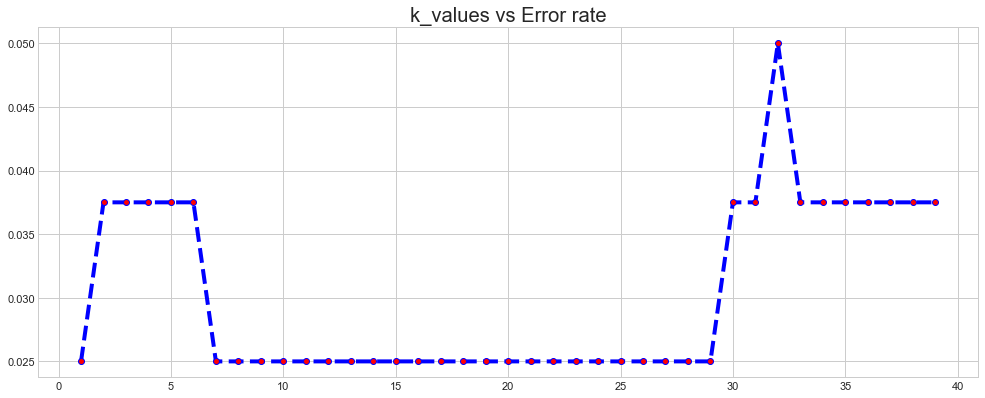

In [139]:
#plotting error rate vs n_neighbors
plt.figure(figsize=(15,6))
plt.plot(range(1,40),Error_rate,marker = 'o',markerfacecolor = 'red', linestyle = 'dashed',
         color = 'blue')
plt.title('k_values vs Error rate')
plt.show()

We will select n_neighbors as 8. Since at 7-8 error rate is least and importantly stable. 

In [140]:
# fitting best parameters  KNN classifier for prediction
knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(X_train, y_train)

# accuracy score
scores_train = cross_val_score(knn, X_train, y_train, cv=10)
scores_test = cross_val_score(knn, X_test, y_test, cv=10)

# Mean of 10 fold cross validated score
accuracy_knn_train = np.mean(scores_train)
accuracy_knn_test = np.mean(scores_test)

print('Accuracy score for the KNN model on train data is:',round(accuracy_knn_train*100,2),'%')
print('Accuracy score for the KNN model on test data is:',round(accuracy_knn_test*100,2),'%')

Accuracy score for the KNN model on train data is: 93.44 %
Accuracy score for the KNN model on test data is: 91.25 %


In [141]:
# Classifier
knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)

# Nested CV with parameter optimization

nested_score = cross_val_score(knn, X_test, y=y_test, cv=10,
               scoring=make_scorer(classification_report_with_accuracy_score))
print('Accuracy score for the KNN model on test data is:',round(nested_score.mean()*100,2),'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   mac

## XGB Boost

In [142]:
# fitting parameters to XGB model for prediction
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

# fitting data
xgb.fit(X_train, y_train)

# accuracy score
scores_train = cross_val_score(xgb, X_train, y_train, cv=10)
scores_test = cross_val_score(xgb, X_test, y_test, cv=10)

# Mean of 10 fold cross validated score
accuracy_xgb_train = np.mean(scores_train)
accuracy_xgb_test = np.mean(scores_test)

print('Accuracy score for the XGB model on train data is:',round(accuracy_xgb_train*100,2),'%')
print('Accuracy score for the XGB model on test data is:',round(accuracy_xgb_test*100,2),'%')

Accuracy score for the XGB model on train data is: 97.19 %
Accuracy score for the XGB model on test data is: 100.0 %


In [143]:
# Classifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

# Nested CV with parameter optimization

nested_score = cross_val_score(xgb, X_test, y=y_test, cv=10,
               scoring=make_scorer(classification_report_with_accuracy_score))
print('Accuracy score for the XGB model on test data is:',round(nested_score.mean()*100,2),'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   mac

# Feature Importance

### Using Logistic regression

In [157]:
# object instantiation
logr = LogisticRegression()

#fitting model for prediction
logr = logr.fit(X_train, y_train)

In [158]:
cdf_logr = pd.DataFrame(np.abs((logr.coef_)[0]),X_train.columns, columns=['Coefficient'])
cdf_logr.sort_values(by ='Coefficient',ascending=False,inplace=True )

In [159]:
px.defaults.template = "plotly_dark"

In [160]:
px.bar(data_frame=cdf_logr,x=cdf_logr.index,y=cdf_logr.Coefficient,color_discrete_sequence=['yellow'])

### Using Random forest

In [166]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 3, max_features= 'auto',
                            min_samples_leaf= 2, min_samples_split= 2, n_estimators= 50)

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=50)

In [168]:
cdf_rf = pd.DataFrame({'Features':X_train.columns,'Coefficient':rf.feature_importances_}).sort_values(by='Coefficient',ascending=False)
cdf_rf

Features  Coefficient
7              serum_creatinine     0.192308
2              specific_gravity     0.183888
10                  haemoglobin     0.167699
11           packed_cell_volume     0.113773
3                       albumin     0.090078
18             hypertension_yes     0.074644
13         red_blood_cell_count     0.050958
19        diabetes_mellitus_yes     0.027551
1                blood_pressure     0.015940
5          blood_glucose_random     0.015139
8                        sodium     0.013374
6                    blood_urea     0.012295
14       red_blood_cells_normal     0.007604
21                appetite_poor     0.007055
22              pedal_edema_yes     0.006494
23                   anemia_yes     0.005947
4                         sugar     0.005905
9                     potassium     0.003679
0                           age     0.003025
15              pus_cell_normal     0.001517
12       white_blood_cell_count     0.001127
17             bacteria_present     0.000000
20  coronary_artery_disease_yes     0.000000
16      pus_cell_clumps_present     0.000000

In [169]:
px.bar(data_frame=cdf_rf,x=cdf_rf['Features'],y=cdf_rf.Coefficient,color_discrete_sequence=['yellow'])

write feature

### using SVM

In [170]:
# fitting best parameters to SVC for prediction
svc = SVC(C=10,gamma=1,kernel='linear')

# Fitting data to model
svc = svc.fit(X_train, y_train)

cdf_svc = pd.DataFrame(np.abs((svc.coef_)[0]),X_train.columns, columns=['Coefficient'])
cdf_svc.sort_values(by ='Coefficient',ascending=False,inplace=True )

px.bar(data_frame=cdf_svc,x=cdf_svc.index,y=cdf_svc.Coefficient,color_discrete_sequence=['yellow'])

# Using XGB

In [171]:
# fitting parameters to XGB model for prediction
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

# fitting data
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [172]:
cdf_xgb = pd.DataFrame({'Features':X_train.columns,'Coefficient':xgb.feature_importances_}).sort_values(by='Coefficient',ascending=False)
px.bar(data_frame=cdf_xgb,x=cdf_xgb['Features'],y=cdf_xgb.Coefficient,color_discrete_sequence=['yellow'])

write features

In [179]:
cdf_coef = [cdf_logr,cdf_rf,cdf_svc,cdf_xgb]
clf1 = ['Logistic Regression','Random Forest Classifier','SVM','XG Boost']

In [180]:
cdf = pd.DataFrame({'Model_name': clf1,'Coeficeint':cdf_coef})

**Features of most Importance:**
- Specifc Gravity
- Haemoglobin(correlated to features like Red Blood Cell Count and Packed Cell Volume)
- Albumin 
- Serum Creatinine
- Hypertension
- Appetite 
- Diabetes Mellitus

##### There are many features required to predict accurately presence of CKD in case of Logitsic regression and SVM. But on other hand less features would are required to predict CKD using Random Forest and XBBooster models. 
##### It would be interesting to see prediction accuracy considering less features.

# Comparing models

In [173]:
# List of train score data
train_score=[accuracy_xgb_train,accuracy_svc_train,accuracy_rf_train,accuracy_logr_train,accuracy_dt_train]
test_score = [accuracy_xgb_test,accuracy_svc_test,accuracy_rf_test,accuracy_logr_test,accuracy_dt_test]
clf = ['XGB Classifier','SVM Classifier', 'Random Forest Classifier',
 'Logistic Regression','Decision Tree Classifier']

In [174]:
models = pd.DataFrame({'Model_name': clf,'Training Accuracy':train_score,'Testing Accuracy': test_score})

In [175]:
models

Model_name  Training Accuracy  Testing Accuracy
0            XGB Classifier           0.971875             1.000
1            SVM Classifier           0.984375             0.975
2  Random Forest Classifier           0.978125             0.975
3       Logistic Regression           0.984375             0.975
4  Decision Tree Classifier           0.971875             0.950

In [176]:
models.sort_values(by=['Testing Accuracy','Training Accuracy'],ascending=False)

Model_name  Training Accuracy  Testing Accuracy
0            XGB Classifier           0.971875             1.000
1            SVM Classifier           0.984375             0.975
3       Logistic Regression           0.984375             0.975
2  Random Forest Classifier           0.978125             0.975
4  Decision Tree Classifier           0.971875             0.950

In [177]:
px.defaults.template = "plotly_dark"

In [178]:
# plotting Performance Comparision of Models
figure(figsize=(15,10))
fig = px.bar(x = 'Model_name', y='Testing Accuracy', data_frame=models,color='Training Accuracy',
             color_continuous_scale='Viridis')
fig.update_layout(title={'text' : 'Performance Comparision of Models','x':0.5,'xanchor':'center'})
fig.show()

<Figure size 1080x720 with 0 Axes>

# Observations:

- SVM and Logistic regression model have performed well on both the training and test set. Few reasons behind this can be:
 1. There is a Linear relationship between the predictor variable and target variable. This makes it easier for logistic regression and linear SVM models to predict the target variable. Since, Logistic regression and Linear SVM model works best for linear data.
 2. Small size of the data.
 3. The binary nature of target variable also suits logistic regression model.
 
 
- XGB Booting has performed best on the test data. This boosting model has outperformed any other model. 


- Random forest classsifier has performed good on the test data 


- Decision trees have perfromed good on training data but worst on test data. Since the size of data is small decision tree tend to over fit the data. But we can see that random forest has performed well even with small size data. That is the power of bagging.

# Conclusion


Even though XGB Booting classsifier has performed best on the test data. We will consider Logistic regression model. Reasons being:
- Boosting algorithms are more complicated which leads to more consumption of computational time.
- Boosting algorithms are more complex in nature whereas logitsic regression is much simple algorithm.
- Logistic regression is more interpretable and explaianble. This is important in case of diagnosis of kidney disease. We want to find features which are more responsible for this disease.
- During EDA the linear relationship between predictor and target variable.

Thus, we will go ahead with Logistic regression.